In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Simulation length

# Initialise
π_RE = np.zeros((T,1))
π_AE = np.zeros((T,1))
π_exp = np.zeros((T,1))
c_y_RE = np.zeros((T,1))
c_o_RE = np.zeros((T,1))
c_y_AE = np.zeros((T,1))
c_o_AE = np.zeros((T,1))
u_RE = np.zeros((T,1))
u_AE = np.zeros((T,1))

# Initial values
π_RE[0] = 1.5
π_exp[0] = 1.5
π_exp[1] = 1.5

# Time paths for inflation
for t in range(T-1):
    π_RE[t+1] = 3 - 2/π_RE[t]
    π_exp[t+1] = 0.5*π_AE[t-1] + 0.5*π_exp[t]
    π_AE[t] = (1 - 0.5*π_exp[t]) / (1 - 0.5*π_exp[t+1])

# Time paths for consumption
for t in range(T-1):
    c_y_RE[t] = 1 + π_RE[t+1]/2
    c_o_RE[t] = 3 - c_y_RE[t]
    c_y_AE[t] = 1 + π_AE[t+1]/2
    c_o_AE[t] = 3 - c_y_AE[t]

# Time paths for utility levels
for t in range(T-2):
    u_RE[t] = np.log(c_y_RE[t]) +np.log(c_o_RE[t+1])
    u_AE[t] = np.log(c_y_AE[t]) + np.log(c_o_AE[t+1])

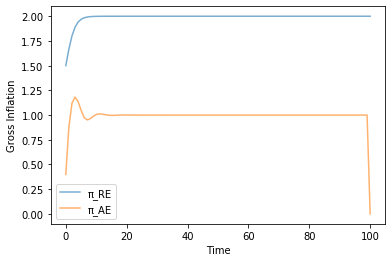

In [7]:
# Plots for inflation dynamics
fig, ax = plt.subplots()

x = np.linspace(0, T, T)
y = [π_RE, π_AE]
labels = ['π_RE', 'π_AE']

for iy, ilabel in zip(y, labels):
    plt.plot(x, iy, label=ilabel, alpha=0.6,)
    
ax.set_ylabel('Gross Inflation')
ax.set_xlabel('Time')
ax.legend()
plt.show()

* Inflation ends up being higher in the Rational Expectations Economy

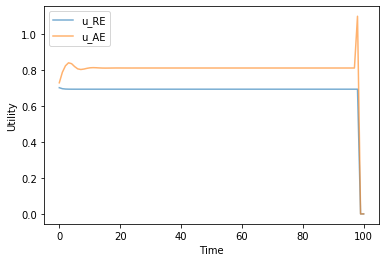

In [8]:
# Plots for utility levels
fig, ax = plt.subplots()

x = np.linspace(0, T, T)
y = [u_RE, u_AE]
labels = ['u_RE', 'u_AE']

for iy, ilabel in zip(y, labels):
    plt.plot(x, iy, label=ilabel, alpha=0.6,)
    
ax.set_ylabel('Utility')
ax.set_xlabel('Time')
ax.legend()
plt.show()

* Notice that the utility level under Adaptive Expectations appears to be higher
* However, this is only under the assumption that all other agents also have adaptive expectations.
* An agent with rational expectation should have higher utility